In [6]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [7]:
def my_det(X):
    X = np.array(X, dtype="float64")
    if X.shape[0] != X.shape[1]:
        raise ValueError()
    elif X.shape[0] == 1:
        return X[0, 0]
    else:
        vector = X[:, 0]
        swap = 2
        max_num = max(vector)
        if max_num == 0:
            return 0
        id_max = vector.argmax(axis=0)
        if id_max != 0:
            save = X[0].copy()
            X[0] = X[id_max];
            X[id_max] = save
            swap -= 1
        for i in range(1, X.shape[0]):
            multiply_koeff = X[i, 0] / X[0, 0]
            X[i] -= multiply_koeff * X[0]
        return (-1) ** swap * X[0, 0] * \
               my_det(X[np.ix_(range(1, X.shape[0]), range(1, X.shape[1]))])

In [13]:
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')
    print(my_det(X), sla.det(X))

-0.04253998446605582 -0.04253998446605583
0.02550634374047554 0.025506343740475564
0.00547267678727693 0.005472676787276937
-0.01805523112146853 -0.018055231121468562
-0.08484901251017833 -0.08484901251017833
-0.0035529518321119435 -0.003552951832111943
0.027192955478658954 0.02719295547865896
0.008651872496802842 0.008651872496802835
-0.07984513238179847 -0.07984513238179845
0.1823191168569881 0.18231911685698818


In [23]:
timings = []
for i in range(1, 501):
    matrix = np.random.rand(i,i)
    startt = time()
    my_det(matrix)
    endt = time()
    t = endt - startt;
    timings.append(t)
plt.plot(timings)

KeyboardInterrupt: 

In [31]:
the_order = 2
iters = 0


def setTriangleMode(matrix, order):
    matrix = np.array(matrix, dtype="float64")
    sign_switch = 0
    current_line = 0
    global iters
    while (current_line != order - 1):
        for i in range(current_line + 1, order):
            line_shift = 1
            while matrix[current_line][current_line] == 0:
                if line_shift >= order - 1:
                    return [[0]], 0
                matrix[current_line], matrix[current_line + line_shift] = matrix[current_line + line_shift], matrix[
                    current_line]
                line_shift += 1
                sign_switch += 1

            multiply_koeff = matrix[i, current_line] / matrix[current_line, current_line]

            for j in range(order):
                matrix[i, j] -= matrix[current_line, j] * multiply_koeff

            iters += 1

        current_line += 1

    return matrix, sign_switch


def drawMatrix(matrix):
    for row in matrix:
        for elem in row:
            print(elem, end=" ")
        print()
    print()


def getDeterminant(matrix, order):
    matrix, sign = setTriangleMode(matrix, order)
    # drawMatrix(matrix)
    determinant = 1

    for i in range(len(matrix)):
        determinant *= matrix[i, i]

    return (-1) ** sign * determinant

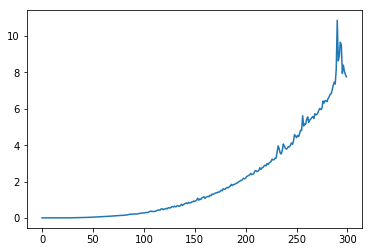

In [39]:
timings = []
for i in range(1, 301):
    matrix = np.random.rand(i,i)
    startt = time()
    getDeterminant(matrix, i)
    endt = time()
    t = endt - startt;
    timings.append(t)
plt.plot(timings)

O$(log{n} * n^3)$

[0.00011277198791503906,
 4.792213439941406e-05,
 4.100799560546875e-05,
 6.031990051269531e-05,
 0.00010848045349121094,
 0.00017642974853515625,
 0.00021958351135253906,
 0.0001838207244873047,
 0.00033855438232421875,
 0.00032901763916015625,
 0.00042700767517089844,
 0.0005440711975097656,
 0.0006866455078125,
 0.0009109973907470703,
 0.001111745834350586,
 0.0013477802276611328,
 0.0030083656311035156,
 0.001798868179321289,
 0.0024046897888183594,
 0.004316806793212891,
 0.005719184875488281,
 0.008351802825927734,
 0.003698110580444336,
 0.005093812942504883,
 0.004534006118774414,
 0.006478309631347656,
 0.007183074951171875,
 0.006201267242431641,
 0.008692026138305664,
 0.009261131286621094,
 0.009582042694091797,
 0.009291887283325195,
 0.013468027114868164,
 0.013326883316040039,
 0.013707637786865234,
 0.016820907592773438,
 0.015944719314575195,
 0.017564773559570312,
 0.017281532287597656,
 0.02036309242248535,
 0.021157264709472656,
 0.022566556930541992,
 0.02438759803

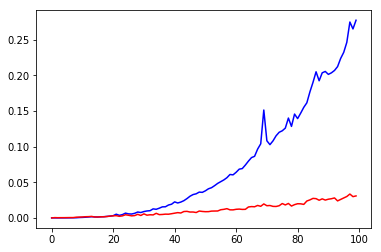

In [48]:
timings = []
timings1 = []
for i in range(1, 101):
    matrix = np.random.rand(i,i)
    startt1 = time()
    getDeterminant(matrix, i)
    endt1 = time()
    t1 = endt1 - startt1
    startt2 = time()
    my_det(matrix)
    endt2 = time()
    t2 = endt2 - startt2;
    timings.append(t1)
    timings1.append(t2)
plt.plot(range(len(timings)),timings, color='blue', label='ET')
plt.plot(range(len(timings1)), timings1, color='red', label='recursive')
plt.show()

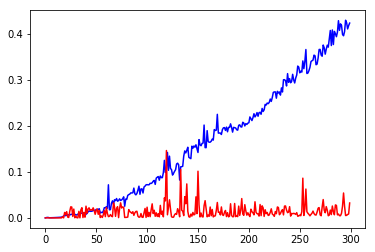

In [49]:
timings = []
timings1 = []
for i in range(1, 301):
    matrix = np.random.rand(i,i)
    startt1 = time()
    my_det(matrix)
    endt1 = time()
    t1 = endt1 - startt1
    startt2 = time()
    sla.det(matrix)
    endt2 = time()
    t2 = endt2 - startt2;
    timings.append(t1)
    timings1.append(t2)
plt.plot(range(len(timings)),timings, color='blue', label='ET')
plt.plot(range(len(timings1)), timings1, color='red', label='recursive')
plt.show()

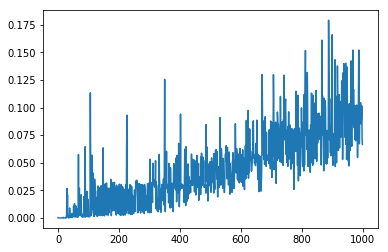

In [51]:
timings = []
for i in range(1, 1001):
    matrix = np.random.rand(i,i)
    startt = time()
    sla.det(matrix)
    endt = time()
    t = endt - startt;
    timings.append(t)
plt.plot(timings)

In [52]:
def misha(matrix, order):
    output = 1
    k = 0
    kk = 2
    if order > 2:
        while k < order - 1:
            for i in range(k + 1, order):
                if matrix[k, k] == 0:
                    array = matrix[k]
                    matrix[k] = matrix[i]
                    matrix[i] = array
                    kk += 1
                mul = matrix[i, k] / matrix[k, k]
                for j in range(k, order):
                    matrix[i, j] = matrix[i, j] - matrix[k, j] * mul
            k += 1
        for j in range(order):
            output *= matrix[j, j]
        output *= (-1) ** kk
    return output

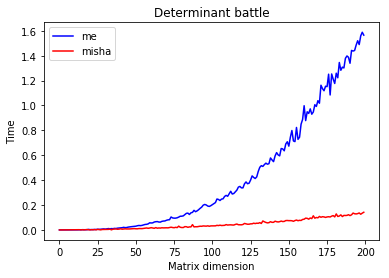

In [55]:
timings = []
timings1 = []
for i in range(1, 201):
    matrix = np.random.rand(i,i)
    startt1 = time()
    misha(matrix, i)
    endt1 = time()
    t1 = endt1 - startt1
    startt2 = time()
    my_det(matrix)
    endt2 = time()
    t2 = endt2 - startt2;
    timings.append(t1)
    timings1.append(t2)
plt.plot(range(len(timings)),timings, color='blue', label='me')
plt.plot(range(len(timings1)), timings1, color='red', label='misha')
plt.title('Determinant battle')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()
plt.show()